# Basic classification: Classify images of clothing

This guide trains a neural network model to classify images of clothing, like sneakers and shirts.

It uses tf.keras, a high-level API to build and train models in TensorFlow.

_Source_: https://www.tensorflow.org/tutorials/keras/classification

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

**Check TensorFlow version**

In [2]:
print(tf.__version__)

2.4.1


## Import the Fashion MNIST dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**Since the class names are not included with the dataset, store them here to use later when plotting the images**

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [5]:
print("train_images shape", train_images.shape)
print("train_labels shape", train_labels.shape)
print("train_labels", train_labels)

print("------------------------------------")

print("test_images shape", test_images.shape)
print("test_labels shape", test_labels.shape)
print("test_labels", test_labels)

train_images shape (60000, 28, 28)
train_labels shape (60000,)
train_labels [9 0 0 ... 3 0 5]
------------------------------------
test_images shape (10000, 28, 28)
test_labels shape (10000,)
test_labels [9 2 1 ... 8 1 5]


## Preprocess the data

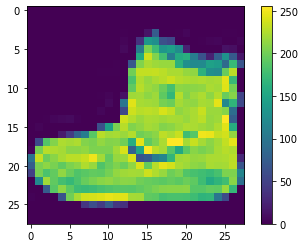

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Scale these values to a range of 0 to 1 before feeding them to the neural network model**

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

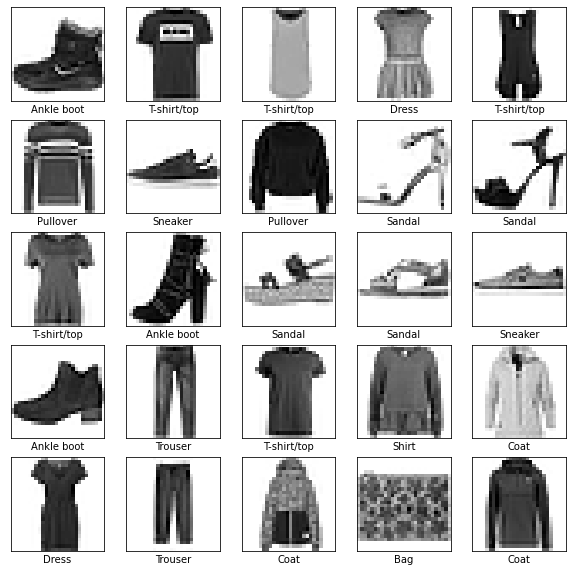

In [8]:
plt.figure(figsize=(10,10))

for i in  range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

## Build the model

### Set up the layers

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2022-01-29 17:22:47.983880: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-29 17:22:47.984039: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-29 17:22:47.984632: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Compile the model

In [10]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

### Feed the model

In [11]:
model.fit(train_images, train_labels, epochs=10)

2022-01-29 17:37:05.814227: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-29 17:37:05.834623: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6200 - accuracy: 0.7848
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3916 - accuracy: 0.8597
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3379 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3104 - accuracy: 0.8872
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2932 - accuracy: 0.8930
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2786 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2618 - accuracy: 0.9038
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2582 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2501 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.23

### Evaluate accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.3303 - accuracy: 0.8834

Test accuracy:  0.883400022983551


### Make predictions

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([5.0413149e-07, 3.4380059e-09, 7.2944456e-10, 1.8109011e-12,
       8.3808155e-10, 2.2339178e-03, 1.2594263e-07, 5.3010192e-03,
       5.4600924e-09, 9.9246442e-01], dtype=float32)

In [23]:
print("test_image[0] prediction:", np.argmax(predictions[0]))
print("test_image[0] ground truth:", test_labels[0])

test_image[0] prediction: 9
test_image[0] ground truth: 9


### Verify predictions

**Graph this to look at the full set of 10 class predictions**

In [26]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100 * np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

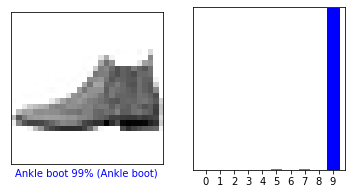

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

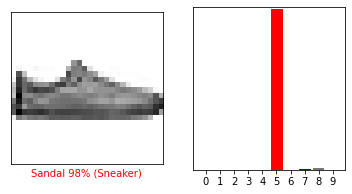

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

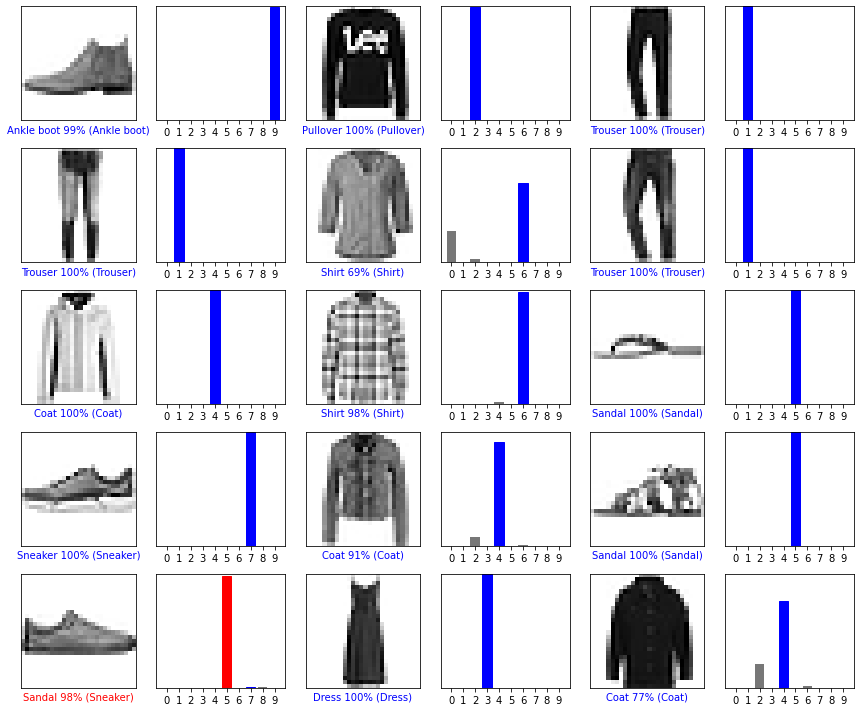

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

### Use the trained model

In [33]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [35]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 1, 28, 28)


In [37]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.5391524e-04 5.2048419e-09 9.9600500e-01 8.2974116e-09 1.9360619e-03
  4.5826355e-12 1.9051173e-03 7.6958561e-12 5.6716093e-10 6.6779378e-09]]


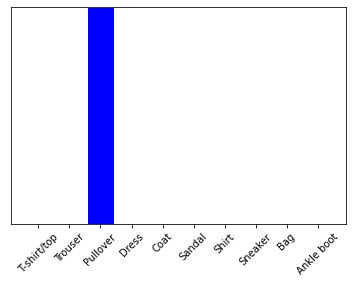

In [38]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [39]:
np.argmax(predictions_single[0])

2